<h1>Реализация Adaline</h1>

In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
class Adaline(object):
    
    def __init__(self, b = 0, weights = None):
        self.weights = weights
        self.b = b

    def fit(self, X, y, lr = 0.1, epoch = 100):
        X = np.array(X)
        y = np.array(y)
        n = len(y)
        m = X.shape[1]
        

        if self.weights is None:
            self.weights = np.random.rand(m, 1)
        
        for i in range(epoch):
            flag = True

            for j in range(n):
                row_x = X[j].reshape((1, -1))
                dis = (y[j] - self.predict(row_x))[0]
                if dis:
                    flag = False
                    self.weights += (dis * lr * row_x).reshape((m, -1))
                    self.b += dis * lr
            if flag:
                break

    def predict(self, X):
        X = np.array(X)
        m = X.shape[1]

        if self.weights is None:
            self.weights = np.random.rand(m, 1)
        
        h = X @ self.weights + self.b 
        result = np.where(h > 0, 1, 0)
        
        return [x[0] for x in result]

<h1>Проверка Adaline</h1>

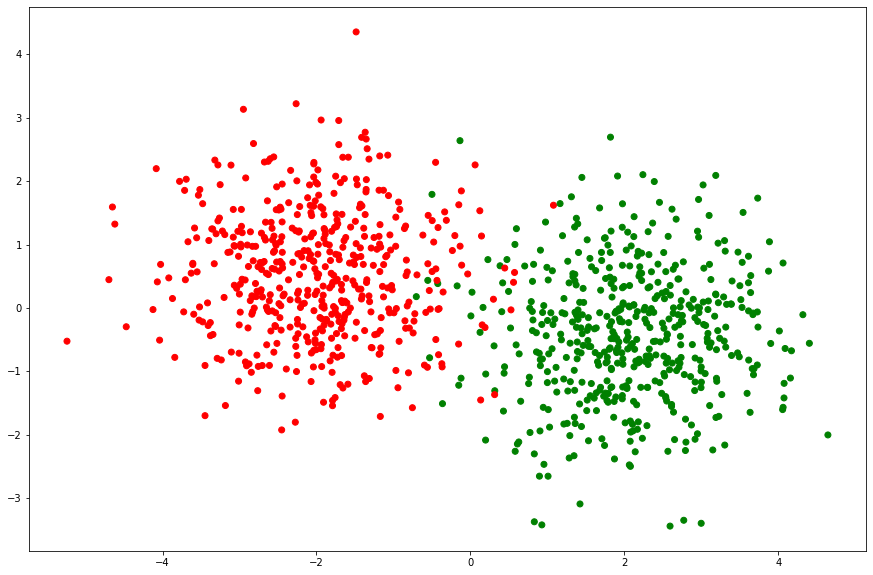

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [115]:
clm = Adaline()
clm.fit(X, y)
y_pred = clm.predict(X)
print(y)
print(y_pred)


[1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1
 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 

In [116]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y)
print(f'Model accuracy = {score}')

Model accuracy = 0.973


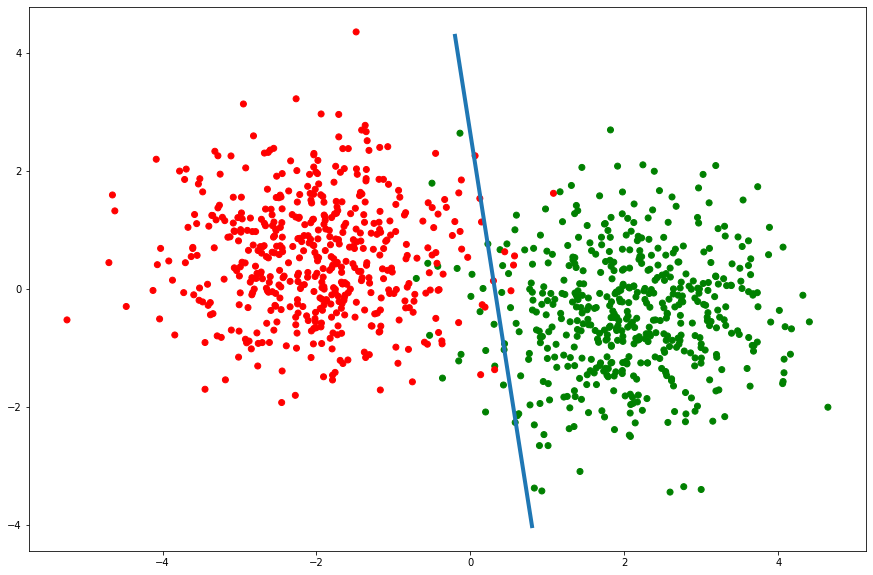

In [122]:
weights = clm.weights
b = clm.b
x = [-0.2, 0.8]
y_plot = -1 *(x * weights[0] + b) / weights[1]

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.plot(x, y_plot, lw = 4)
plt.show()

<h1>Реализация Multy adaline</h1>

In [124]:
import math

In [205]:
class Madaline(object):

   def __init__(self, number = 2):
      self.number = number
      n = math.comb(number, 2)
      self.adaline = []
      for _ in range(n):
         self.adaline.append(Adaline())
      self.labels = [i + 1 for i in range(number)]

   def fit(self, X, y, lr = 0.1, epoch = 100):
      data = list(zip(X, y))
      self.labels = np.unique(y)
      count = 0

      for i in range(self.number - 1):
         for j in range(i + 1, self.number):
            X = [x[0] for x in data if (x[1] == self.labels[i] or x[1] == self.labels[j])]
            y_buf = np.array([x[1] for x in data if (x[1] == self.labels[i] or x[1] == self.labels[j])])
            y = np.where(y_buf == self.labels[i], 0, 1)
            self.adaline[count].fit(X, y, lr, epoch)
            count += 1


   def predict(self, X):
      m = len(X)
      results = np.zeros((m, self.number))

      n = math.comb(self.number, 2)
      count = 0

      for i in range(self.number - 1):
         for j in range(i + 1, self.number):
            result = self.adaline[count].predict(X)
            count += 1
            for k in range(m):
               if result[k]:
                  results[k][j] += 1
               else:
                  results[k][i] += 1

      new_results = [0] * m
      for k in range(m):
         max_index = results[k].tolist().index(max(results[k]))
         new_results[k] = self.labels[max_index]
      return new_results

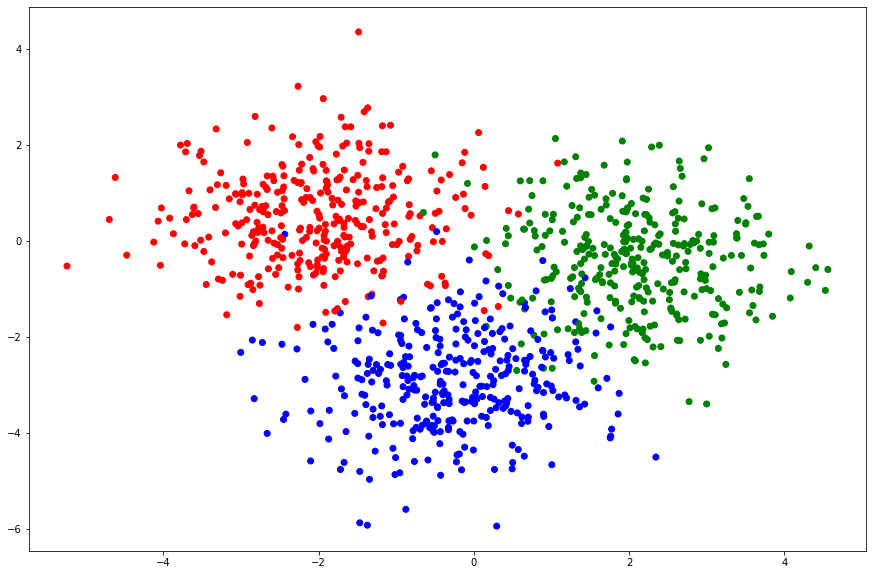

In [161]:
X2, y2 = make_blobs(n_samples=1000, centers=[[-2, 0.5], [2, -0.5], [-0.3, -3]], cluster_std=1, random_state=42)

colors = ("red", "green", "blue")
colored_y2 = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1, 2]):
    colored_y2[y2 == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X2[:, 0], X2[:, 1], c = colored_y2)
plt.show()

In [209]:
clm2 = Madaline(3)
clm2.fit(X2, y2, 0.01, 200)
y_pred2 = clm2.predict(X2)
print(y2)
print(y_pred2)

[2 2 0 2 0 0 2 0 1 2 0 1 1 1 1 2 1 1 2 0 0 0 0 2 1 0 0 2 2 1 1 2 0 2 0 1 0
 1 2 0 2 1 2 1 0 0 1 1 1 1 0 0 1 1 0 2 2 1 1 1 1 2 1 0 0 0 0 0 1 2 1 1 2 2
 0 1 0 1 2 2 1 0 0 1 1 2 0 1 0 1 0 2 0 1 0 1 0 0 1 0 1 0 1 2 2 2 2 1 0 0 2
 1 2 0 2 2 1 2 1 0 1 0 1 1 1 0 2 1 1 0 0 2 0 2 1 1 0 1 2 0 2 2 0 1 1 0 2 0
 2 1 0 2 1 0 0 0 0 0 1 2 0 0 0 1 1 2 2 0 2 0 1 0 1 2 0 2 1 1 1 1 1 2 2 1 0
 0 1 0 0 1 0 2 1 2 2 1 2 1 1 1 0 1 0 2 1 2 2 1 0 2 0 0 1 2 0 0 0 0 1 2 2 2
 1 1 2 1 2 1 2 2 1 0 0 0 2 2 2 0 1 0 1 0 1 1 1 0 1 1 0 2 1 0 1 1 2 1 1 2 0
 2 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 1 0 2 2 0 1 1 1 0 2 1 2 0 2 1 1 2 0 2 1
 0 2 2 2 2 2 1 1 2 1 0 2 2 2 2 2 2 2 0 1 0 0 1 2 1 2 0 2 1 1 2 1 1 2 0 0 2
 2 0 0 0 0 0 1 0 0 1 0 0 2 1 1 2 2 1 1 2 1 1 2 1 0 0 2 0 0 2 0 1 1 2 1 2 2
 0 2 1 2 1 0 1 0 2 1 1 0 1 0 0 1 0 2 0 2 1 0 0 2 0 2 1 2 1 2 0 2 1 0 0 0 0
 0 2 1 1 2 2 2 0 2 0 1 2 2 2 2 0 2 1 2 0 0 1 0 2 1 2 2 0 0 2 0 2 2 1 0 1 1
 0 0 1 1 2 2 1 0 2 0 0 2 2 1 1 0 1 0 1 2 1 1 0 1 2 0 0 0 1 0 2 0 2 2 1 2 2
 2 0 2 0 0 1 0 1 0 1 0 2 

In [210]:
score2 = accuracy_score(y_pred2, y2)
print(f'Model accuracy = {score2}')

Model accuracy = 0.935


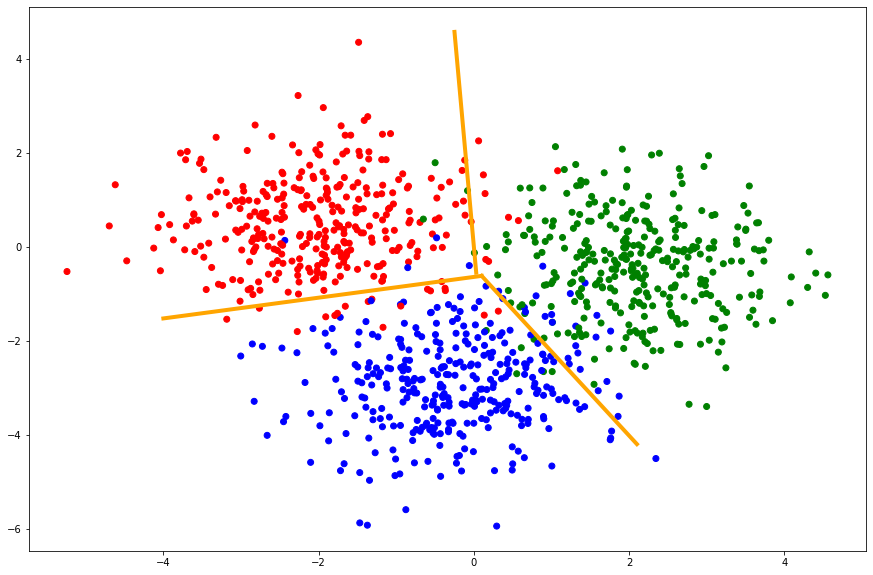

In [217]:
weights2_0 = clm2.adaline[0].weights
b2_0 = clm2.adaline[0].b
x2_0 = [-0.25, 0.03]
y_plot2_0 = -1 *(x2_0 * weights2_0[0] + b2_0) / weights2_0[1]

weights2_1 = clm2.adaline[1].weights
b2_1 = clm2.adaline[1].b
x2_1 = [-4, 0.1]
y_plot2_1 = -1 *(x2_1 * weights2_1[0] + b2_1) / weights2_1[1]

weights2_2 = clm2.adaline[2].weights
b2_2 = clm2.adaline[2].b
x2_2 = [0.1, 2.1]
y_plot2_2 = -1 *(x2_2 * weights2_2[0] + b2_2) / weights2_2[1]

plt.figure(figsize=(15,10))
plt.scatter(X2[:, 0], X2[:, 1], c=colored_y2)
plt.plot(x2_0, y_plot2_0, lw = 4, color = 'orange')
plt.plot(x2_1, y_plot2_1, lw = 4, color = 'orange')
plt.plot(x2_2, y_plot2_2, lw = 4, color = 'orange')
plt.show()